# **Setup**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Used to upload training and testing files
from google.colab import files
uploaded = files.upload()

Saving TestingDataBinary.csv to TestingDataBinary.csv
Saving TestingDataMulti.csv to TestingDataMulti.csv
Saving TrainingDataBinary.csv to TrainingDataBinary.csv
Saving TrainingDataMulti.csv to TrainingDataMulti.csv


In [ ]:
# print out accuracy, precision, recall, and F1 scores for each model based on true and predicted values
# average is macro for part b, and binary for part a
def eval_metrics(true,pred,avg):
  acc = accuracy_score(true,pred)
  prec = precision_score(true,pred, average=avg)
  recall = recall_score(true,pred, average=avg)
  f1 = f1_score(true,pred, average=avg)
  print('Accuracy: ',acc,", Precision: ",prec,", Recall: ",recall,", F1: ",f1)

In [ ]:
# Plot confusion matrix
def confusion_matrix_diagram(c_matrix):
  sns.heatmap(c_matrix, fmt='d', annot=True, square=True,
            # xticklabels=[0,1], yticklabels=[0,1],
            cmap='gray_r', vmin=0, vmax=0,
            linewidths=0.5, linecolor='k',
            cbar=False)
  sns.despine(left=False, right=False, top=False, bottom=False)

  plt.title("Confusion matrix for Random Forest", fontsize=16)
  plt.ylabel('True class', fontsize=14) # increase font size for readability
  plt.xlabel('Predicted class', fontsize=14)
  plt.tight_layout()
  plt.rcParams["figure.figsize"] = (8, 6) # make plot smaller for readability


# **Train Data Preparation**

In [ ]:
train_data_bin = pd.read_csv('TrainingDataBinary.csv')
labels_bin = train_data_bin['marker'] # marker is the class to predict
features_bin = train_data_bin.drop(['marker'], axis=1) # remove marker column from train data
features_bin.head() # display first 5 rows of train data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,66.445916,133715.7489,-53.537176,133715.7489,-173.531727,133790.9687,63.896253,589.79731,-60.464236,622.57400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,59.908467,127622.9443,-60.068895,127597.8710,179.943125,127673.0908,55.089892,629.34907,-67.964254,654.06892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58.630771,127296.9918,-61.346591,127271.9185,178.659700,127372.2116,52.987137,638.68768,-69.494051,658.09734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62.996710,131534.3744,-56.980653,131509.3012,-176.969474,131609.5942,62.068518,448.25328,-61.237729,466.38117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64.314513,131333.7883,-55.680039,131308.7150,-175.668860,131434.0813,62.979521,451.54926,-59.616259,466.38117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data_mult = pd.read_csv('TrainingDataMulti.csv')
labels_mult = train_data_mult['marker'] # marker is the class to predict
features_mult = train_data_mult.drop(['marker'], axis=1) # remove marker column from train data
features_mult.head() # display first 5 rows in table

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,66.445916,133715.7489,-53.537176,133715.7489,-173.531727,133790.9687,63.896253,589.79731,-60.464236,622.57400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,59.908467,127622.9443,-60.068895,127597.8710,179.943125,127673.0908,55.089892,629.34907,-67.964254,654.06892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58.630771,127296.9918,-61.346591,127271.9185,178.659700,127372.2116,52.987137,638.68768,-69.494051,658.09734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62.996710,131534.3744,-56.980653,131509.3012,-176.969474,131609.5942,62.068518,448.25328,-61.237729,466.38117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64.314513,131333.7883,-55.680039,131308.7150,-175.668860,131434.0813,62.979521,451.54926,-59.616259,466.38117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Random Forest - Part A**

## **Training**

In [ ]:
# Standard scaler used to standardize training data
ft_bin = StandardScaler().fit_transform(features_bin)
# random seed ensures reproducibility, and 20% of data used for validation
x_train,x_test,y_train,y_test = train_test_split(ft_bin,labels_bin,test_size=0.2,random_state=1)

In [ ]:
# Random Forest works well with default parameters, so no grid search is required
best_rf_a = RandomForestClassifier(random_state=1)
best_rf_a.fit(x_train,y_train)
rf_pred = best_rf_a.predict(x_test)
# calculate evaluation metrics for predictions to estimate accuracy on test data
eval_metrics(y_test,rf_pred,'binary')

Accuracy:  0.9891666666666666 , Precision:  0.9917763157894737 , Recall:  0.9869067103109657 , F1:  0.989335520918786


## **Testing**

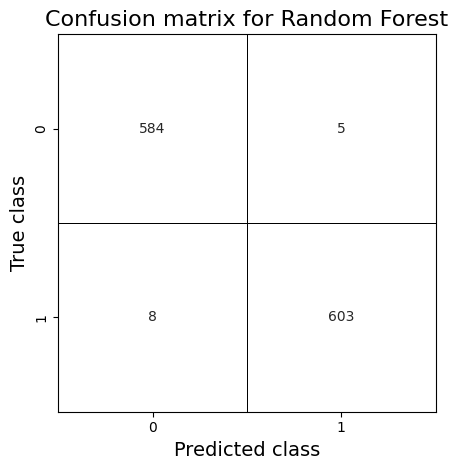

In [ ]:
# generate confusion matrix
cm_a = confusion_matrix(y_test, rf_pred)
confusion_matrix_diagram(cm_a)

In [ ]:
test_data_bin = pd.read_csv('TestingDataBinary.csv')
test_data_bin.head() # display first 5 rows of test data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,108.386426,131835.2537,-11.573747,131810.1804,-131.579758,131885.4002,114.643125,302.49772,-12.421725,333.80953,...,0,0,0,0,0,0,0,0,0,0
1,107.824928,131634.6675,-12.135246,131609.5942,-132.141256,131684.8140,113.159165,307.07547,-12.175353,331.97843,...,0,0,0,0,0,0,0,0,0,0
2,107.378020,131760.0339,-12.582153,131734.9606,-132.588163,131835.2537,111.182460,314.39987,-12.834255,332.52776,...,0,0,0,0,0,0,0,0,0,0
3,107.337913,131810.1804,-12.616531,131760.0339,-132.628270,131860.3269,110.913170,315.68164,-12.948846,332.52776,...,0,0,0,0,0,0,0,0,0,0
4,107.297806,131835.2537,-12.662367,131810.1804,-132.668377,131910.4735,110.563666,316.59719,-13.109274,332.34465,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# since model accuracy is estimated well, use all of train data on random forest for predictions
best_rf_a.fit(features_bin,labels_bin)
pred = best_rf_a.predict(test_data_bin.values)
# create new dataframe for test data and include predictions in this to write to csv
out = test_data_bin.copy()
out['marker'] = pred
print(pred)
out.to_csv("TestingResultsBinary.csv", index=False)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Random Forest - Part B**

## **Training**

In [ ]:
# Standard scaler used to standardize training data
ft_mult = StandardScaler().fit_transform(features_mult)
# random seed ensures reproducibility, and 20% of data used for validation
xm_train,xm_test,ym_train,ym_test = train_test_split(ft_mult,labels_mult,test_size=0.2,random_state=42)

In [ ]:
# Random Forest works well with default parameters, so no grid search is required
best_rf = RandomForestClassifier(random_state=42)
best_rf.fit(xm_train,ym_train)
rf_pred_b = best_rf.predict(xm_test)
# calculate evaluation metrics for predictions to estimate accuracy on test data
eval_metrics(ym_test,rf_pred_b,'macro')

Accuracy:  0.9566666666666667 , Precision:  0.956745904644539 , Recall:  0.9565572219896774 , F1:  0.9565412814517981


## **Testing**

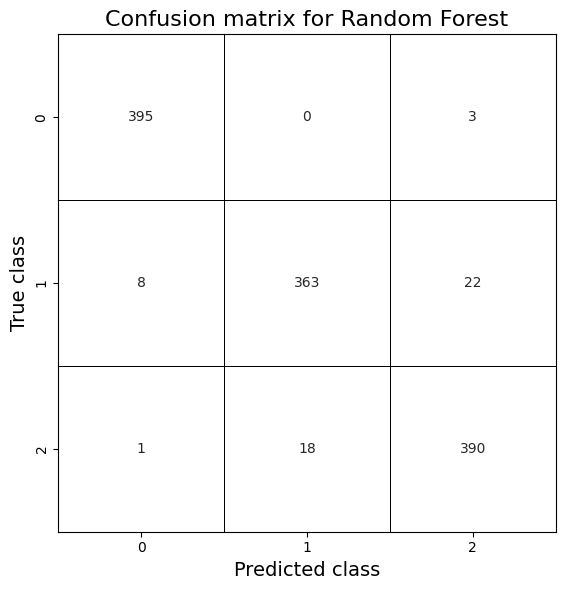

In [ ]:
# generate confusion matrix
cm_b = confusion_matrix(ym_test, rf_pred_b)
confusion_matrix_diagram(cm_b)

In [ ]:
test_data_mult = pd.read_csv('TestingDataMulti.csv')
test_data_mult.head() # display first 5 rows of test data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,-34.377468,130932.6159,-154.360560,130882.4694,85.640002,130982.7625,-38.336606,483.41040,-158.852549,484.50906,...,0,0,0,0,0,0,0,0,0,0
1,-34.451952,130932.6159,-154.429315,130907.5427,85.576976,130982.7625,-38.531412,483.59351,-159.012977,484.87528,...,0,0,0,0,0,0,0,0,0,0
2,-34.492059,130932.6159,-154.475151,130882.4694,85.531140,131007.8358,-38.617355,484.14284,-159.104650,485.24150,...,0,0,0,0,0,0,0,0,0,0
3,-34.555085,130932.6159,-154.532447,130907.5427,85.462385,131007.8358,-38.697569,484.32595,-159.213512,485.24150,...,0,0,0,0,0,0,0,0,0,0
4,-34.658217,130957.6892,-154.641309,130882.4694,85.353523,131032.9090,-38.926753,484.50906,-159.391129,485.60772,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# since model accuracy is estimated well, use all of train data on random forest for predictions
best_rf.fit(features_mult,labels_mult)
pred = best_rf.predict(test_data_mult.values)
# create new dataframe for test data and include predictions in this to write to csv
out = test_data_mult.copy()
out['marker'] = pred # use same column name for predictions as train data
print(pred)
out.to_csv("TestingResultsMulti.csv", index=False)

[0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 0. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
